# Data Augmentation

## 학습 내용

1. 데이터셋의 현실
2. Data Augmentation이란?
3. 텐서플로우를 사용한 Image Augmentation
4. albumentations 라이브러리
5. 더 나아간 기법들

## 개요

* 가지고 있던 Dataset을 여러 가지 방법으로 증강시켜(augment) 실질적인 학습 데이터셋의 규모를 키우는 방법
* 하드디스크에 저장된 이미지 데이터를 메모리에 로드한 후, 학습시킬때 변형

## 다양한 Image Augmentation 방법

* [Tensorflow Data augmentation](https://www.tensorflow.org/tutorials/images/data_augmentation)
* 상황에 따라 라벨도 같이 변경시켜야한다.
* 문자같은 경우 좌우나 상하 반전시 의미가 바뀔 수 있다.

## Image Augmentation

### Flip

#### 준비하기

In [1]:
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt
import os

sample_img_path = 'image/mycat.jpg'
sample_img_path

'image/mycat.jpg'

#### 데이터의 배열을 나타내는 말

1. 0차원, scalar, ex) [1]
2. 1차원, vector, ex) [1,1]
3. 2차원, matrix, ex) [[1,1],[1,1]]
4. 3차원, 3-tensor, ex) [[[1,1],[1,1]],[[1,1],[1,1]],[[1,2],[2,1]]]
5. n차원, n-tensor

* 위의 tensor와 tensorflow의 [tf.tensor](https://www.tensorflow.org/api_docs/python/tf/Tensor)는 의미는 같지만 다르다.

#### image 사이즈 조정


* image_tensor 는 3차원 이상의 Data의 tensor를 뜻합니다.
* tensorflow에서 따로 정의해서 사용하는 tensor는 아닙니다.

<class 'numpy.ndarray'>
(400, 500, 3)


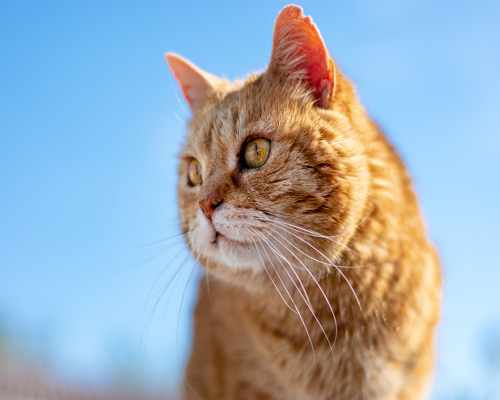

In [2]:
image = Image.open(sample_img_path).resize((500, 400)) # 이미지에 따라 숫자를 바꾸어 보세요.
# image_tensor = tf.keras.utils.img_to_array(image)
image_tensor = tf.keras.preprocessing.image.img_to_array(image)

print(type(image_tensor))
print(image_tensor.shape)

image

#### Flip 해보기

2022-09-27 10:24:32.583977: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-27 10:24:32.680123: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-27 10:24:32.680536: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-27 10:24:32.682782: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

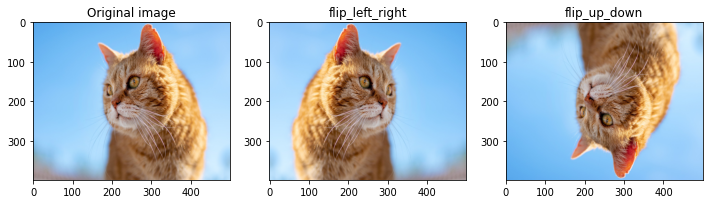

In [3]:
flip_lr_tensor = tf.image.flip_left_right(image_tensor)
flip_ud_tensor = tf.image.flip_up_down(image_tensor)
flip_lr_image = tf.keras.preprocessing.image.array_to_img(flip_lr_tensor)
flip_ud_image = tf.keras.preprocessing.image.array_to_img(flip_ud_tensor)

# flip_lr_image = tf.keras.utils.array_to_img(flip_lr_tensor)
# flip_ud_image = tf.keras.utils.array_to_img(flip_ud_tensor)

plt.figure(figsize=(12, 12))

plt.subplot(1,3,1)
plt.title('Original image')
plt.imshow(image)

plt.subplot(1,3,2)
plt.title('flip_left_right')
plt.imshow(flip_lr_image)

plt.subplot(1,3,3)
plt.title('flip_up_down')
plt.imshow(flip_ud_image)

plt.show()

* random 요소 추가

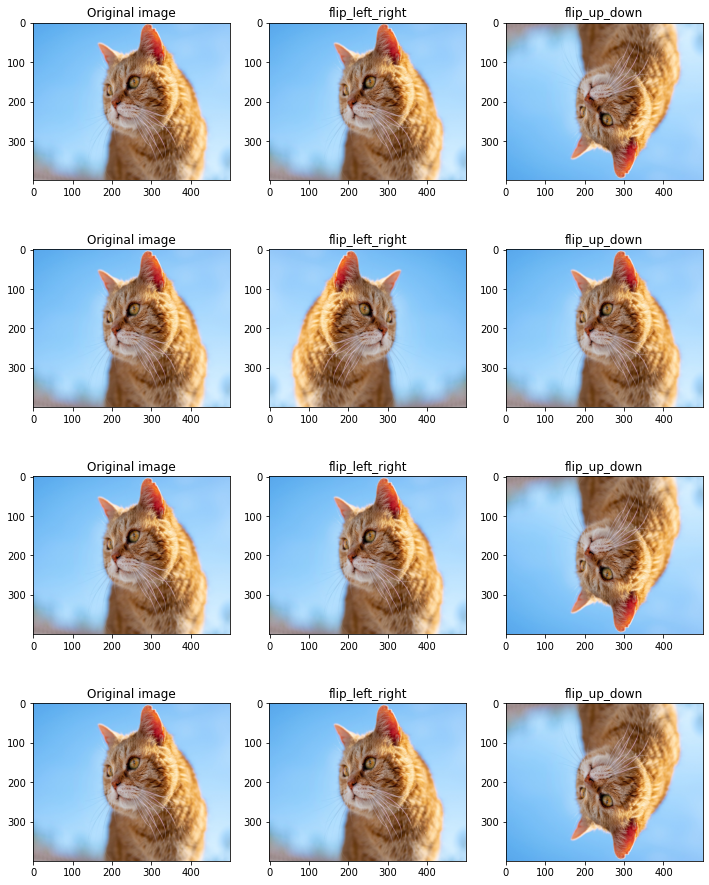

In [4]:
plt.figure(figsize=(12, 16))

row = 4
for i in range(row):
    flip_lr_tensor = tf.image.random_flip_left_right(image_tensor)
    flip_ud_tensor = tf.image.random_flip_up_down(image_tensor)
    # flip_lr_image = tf.keras.preprocessing.image.array_to_img(flip_lr_tensor)
    # flip_ud_image = tf.keras.preprocessing.image.array_to_img(flip_ud_tensor)
    
    flip_lr_image = tf.keras.utils.array_to_img(flip_lr_tensor)
    flip_ud_image = tf.keras.utils.array_to_img(flip_ud_tensor)
    
    plt.subplot(4,3,i*3+1)
    plt.title('Original image')
    plt.imshow(image)

    plt.subplot(4,3,i*3+2)
    plt.title('flip_left_right')
    plt.imshow(flip_lr_image)

    plt.subplot(4,3,i*3+3)
    plt.title('flip_up_down')
    plt.imshow(flip_ud_image)

### Center Crop

* Center crop : 중앙을 자른 이미지를 사용하는 방법
* central_fraction : 얼마나 확대를 할지를 조절하는 매개변수

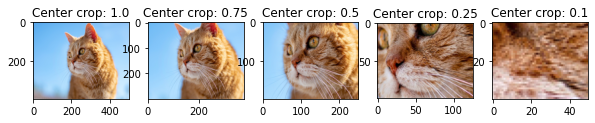

In [5]:
plt.figure(figsize=(12, 15))

central_fractions = [1.0, 0.75, 0.5, 0.25, 0.1]
col = len(central_fractions)
for i, frac in enumerate(central_fractions):
    cropped_tensor = tf.image.central_crop(image_tensor, frac)
    cropped_img = tf.keras.preprocessing.image.array_to_img(cropped_tensor)
    
    plt.subplot(1,col+1,i+1)
    plt.title(f'Center crop: {frac}')
    plt.imshow(cropped_img)

* 랜덤요소 추가
* [tf.random.uniform](https://www.tensorflow.org/api_docs/python/tf/random/uniform)
* [tf.random.normal](https://www.tensorflow.org/api_docs/python/tf/random/normal)

In [6]:
def random_central_crop(image_tensor, range=(0, 1)):
    # range 범위에서 무작위로 잘라낼 비율을 선택합니다
    central_fraction = tf.random.uniform([1], minval=range[0], maxval=range[1], dtype=tf.float32)
    cropped_tensor = tf.image.central_crop(image_tensor, central_fraction)
    return cropped_tensor

* tf.random.uniform([1], minval=range[0], maxval=range[1], dtype=tf.float32)
* 0과 1사이에 균등분포로해서 뽑겠다.

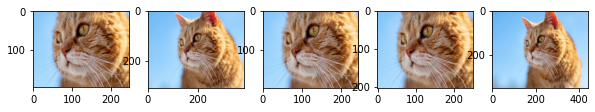

In [7]:
plt.figure(figsize=(12, 15))

col = 5
for i in range(col):
    cropped_tensor = random_central_crop(image_tensor)
    cropped_img = tf.keras.preprocessing.image.array_to_img(cropped_tensor)
    
    plt.subplot(1,col+1,i+1)
    plt.imshow(cropped_img)

## Augmentation 직접해보기

### [tf.image.random_crop()](https://www.tensorflow.org/api_docs/python/tf/image/random_crop)

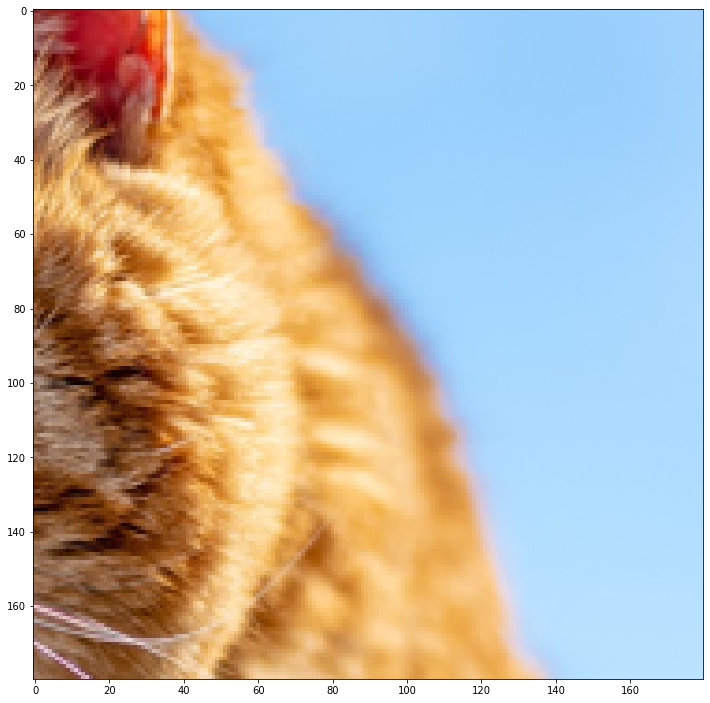

In [8]:
plt.figure(figsize=(12, 15))

random_crop_tensor = tf.image.random_crop(image_tensor,[180,180,3])
random_crop_image = tf.keras.preprocessing.image.array_to_img(random_crop_tensor)

plt.imshow(random_crop_image)
plt.show()

* 5회 반복

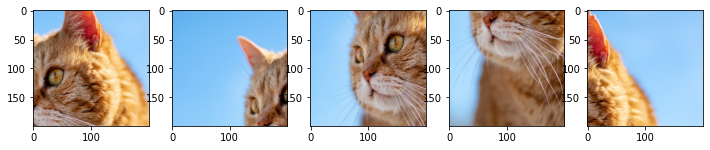

In [9]:
plt.figure(figsize=(12, 15))

for i in range(5):
  random_crop_tensor = tf.image.random_crop(image_tensor,[200,200,3])
  random_crop_image = tf.keras.preprocessing.image.array_to_img(random_crop_tensor)
  plt.subplot(1,5,i+1)
  plt.imshow(random_crop_image)

### [tf.image.random_brightness()](https://www.tensorflow.org/api_docs/python/tf/image/random_brightness)

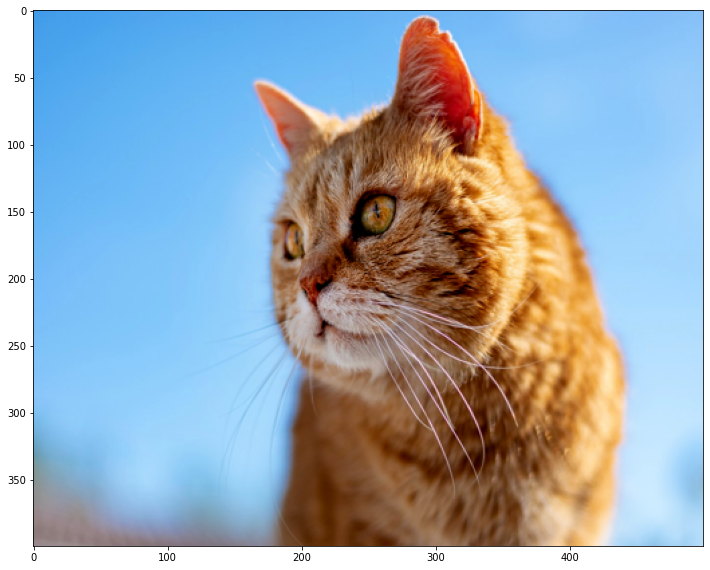

In [10]:
plt.figure(figsize=(12, 15))

random_bright_tensor = tf.image.random_brightness(image_tensor, max_delta=128)
random_bright_tensor = tf.clip_by_value(random_bright_tensor, 0, 255)
random_bright_image = tf.keras.preprocessing.image.array_to_img(random_bright_tensor)

plt.imshow(random_bright_image)
plt.show()

* tf.image.random_brightness : [-max_delta, max_delta]의 랜덤값으로 해서 밝기 조정
* clip_by_value : 이미지에서 min보다 작으면 min으로 max 보다 크면 max값으로 잡아준다.
* 5회 반복

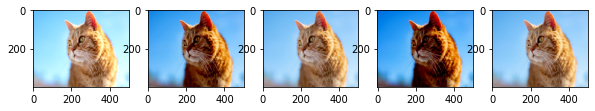

In [11]:
plt.figure(figsize=(12, 15))

col = 5
for i in range(5):
    random_bright_tensor = tf.image.random_brightness(image_tensor, max_delta=128)
    random_bright_tensor = tf.clip_by_value(random_bright_tensor, 0, 255)
    random_bright_image = tf.keras.preprocessing.image.array_to_img(random_bright_tensor)

    plt.subplot(1,col+1,i+1)
    plt.imshow(random_bright_image)

## albumentations 라이브러리

* [albumentations](https://github.com/albumentations-team/albumentations)
* 배열을 이미지의 기본 형태로 사용하기 때문에 PIL Image 데이터형을 numpy로 변환하여 사용

In [12]:
import numpy as np
image = Image.open(sample_img_path).resize((500, 400)) # 이미지에 따라 숫자를 바꾸어 보세요.
# image_arr = np.array(image)
image_arr= tf.keras.preprocessing.image.img_to_array(image, dtype = np.uint8)
image_arr.shape

(400, 500, 3)

In [13]:
def visualize(image):
    plt.figure(figsize=(12, 6))
    plt.imshow(image)

* [transforms.Affine()](https://albumentations.ai/docs/api_reference/augmentations/geometric/transforms/#albumentations.augmentations.geometric.transforms.Affine)
* -45도와 45도 사이에 랜덤하게 각도를 변환하는 augmentation 10장 확인 가능

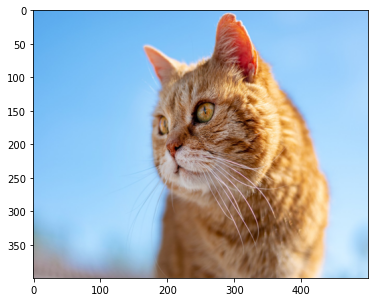

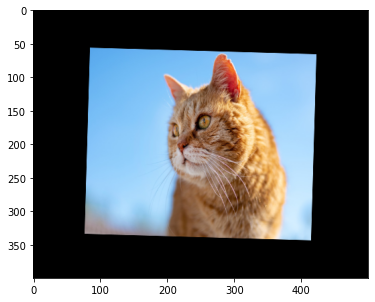

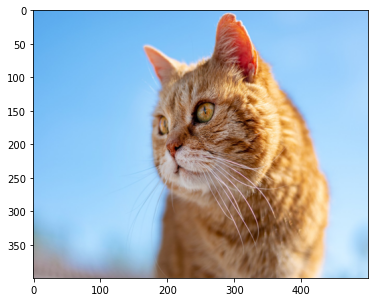

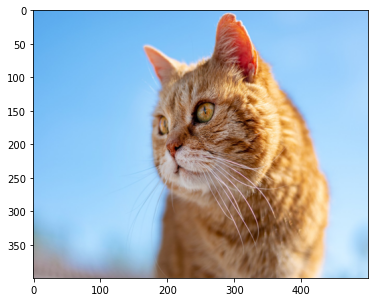

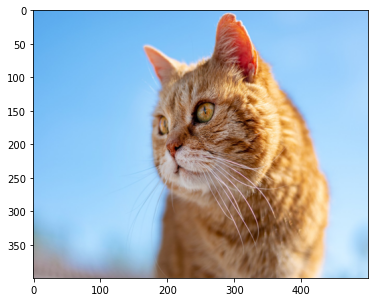

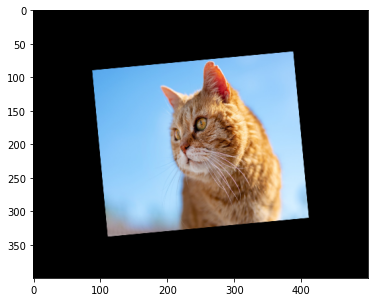

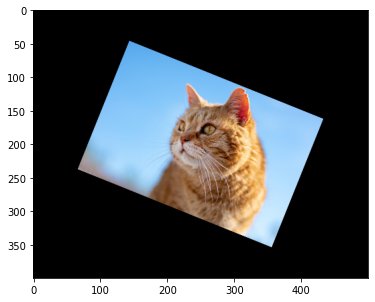

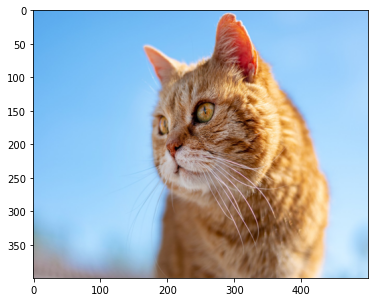

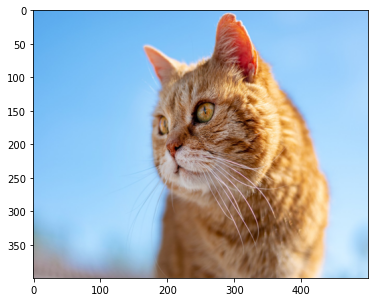

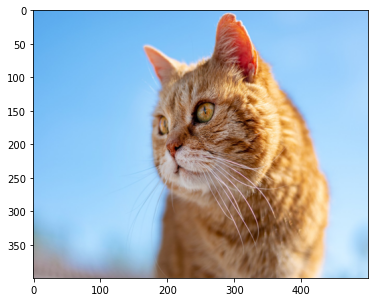

In [14]:
import albumentations as A

for i in range(10):
    transform = A.Compose([
        A.Affine(rotate=(-45, 45),scale=(0.5,0.9),p=0.5) 
    ])
    transformed = transform(image=image_arr)
    plt.figure(figsize=(6,6))
    plt.imshow((transformed['image']))
    plt.show()

* [transforms.RandomCrop()](https://albumentations.ai/docs/api_reference/augmentations/crops/transforms/#albumentations.augmentations.crops.transforms.RandomCrop)

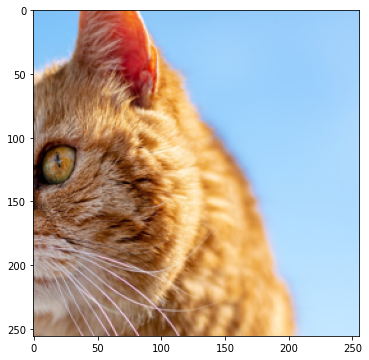

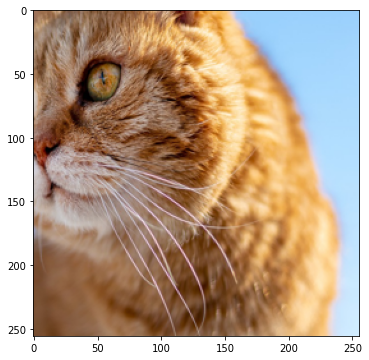

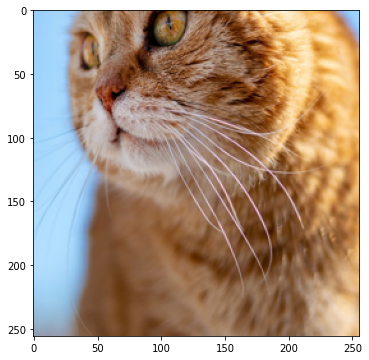

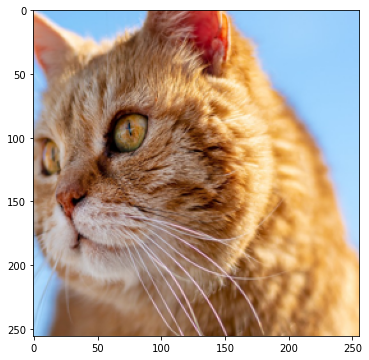

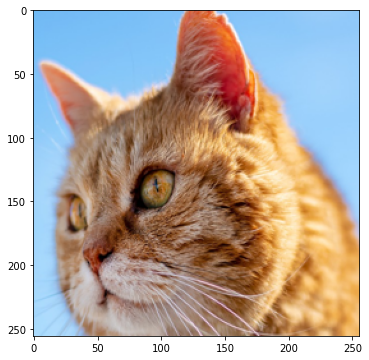

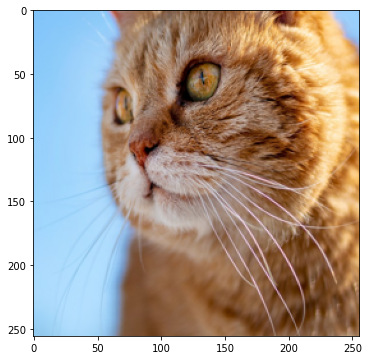

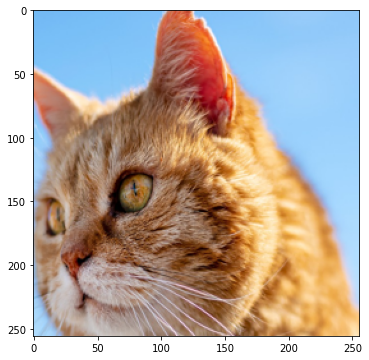

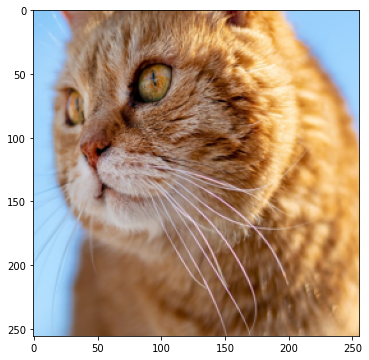

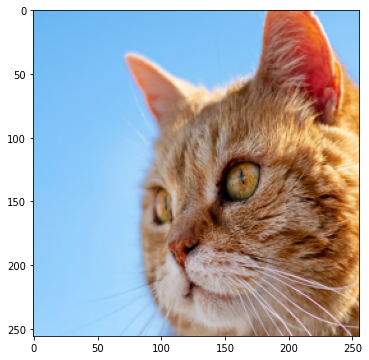

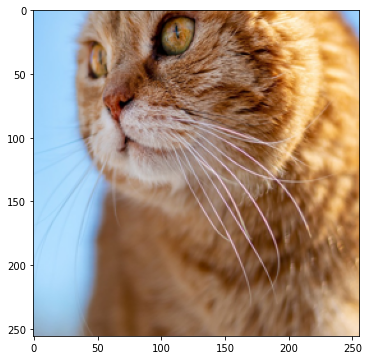

In [15]:
for i in range(10):
    transform = A.Compose(
        [A.RandomCrop(width=256, height=256)]
    )
    transformed = transform(image=image_arr)
    visualize(transformed['image'])

* MedianBlur()
* 블러처리

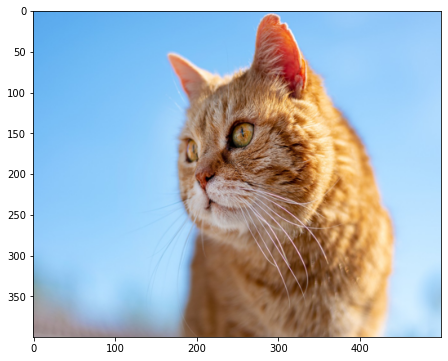

In [16]:
transform = A.Compose(
    [A.MedianBlur(blur_limit=7, always_apply=False, p=0.5)]
)
transformed = transform(image=image_arr)
visualize(transformed['image'])

* augmentation 기법들을 한 번에 조합하여 사용할 수는 없을까?
* ToGray(),MultiplicativeNoise()

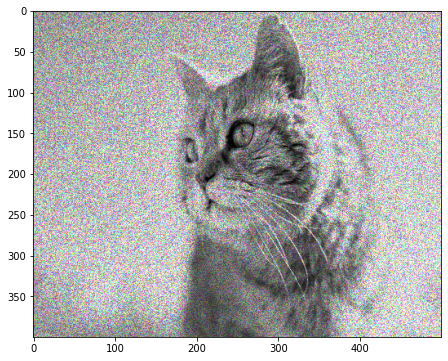

In [17]:
transform = A.Compose(
    [A.ToGray(p=1),
    A.MultiplicativeNoise(multiplier=[0.5, 1.5], elementwise=True, per_channel=True, p=1)]
)
transformed = transform(image=image_arr)
visualize(transformed['image'])

* 그레이 색상의 노이즈 있는 RandomCrop 100장

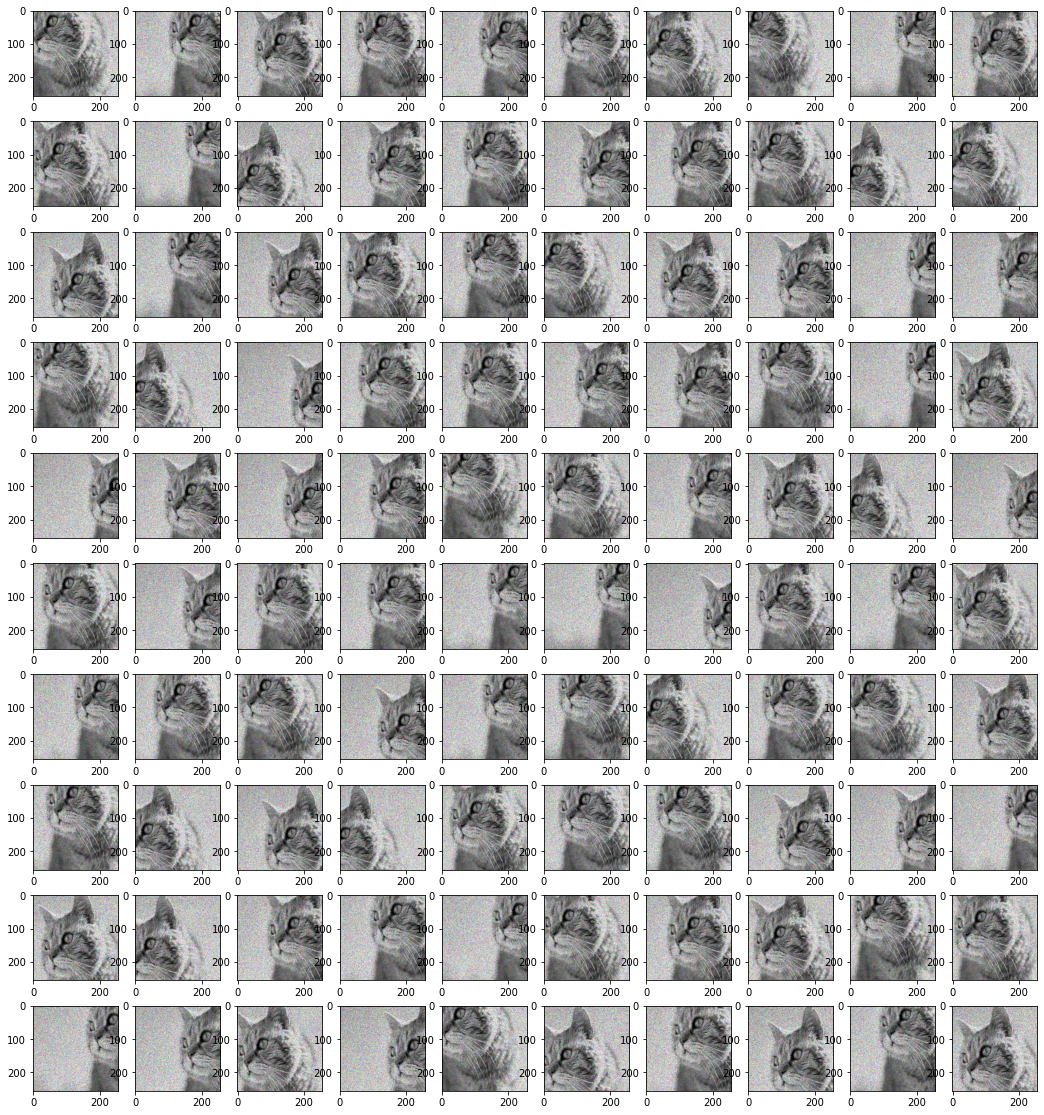

In [18]:
def transform_data(img_arr):
    transform = A.Compose(
        [A.ToGray(p=1),
         A.MultiplicativeNoise(multiplier=[0.5, 1.5], 
                               elementwise=True, per_channel=True, p=1),
         A.RandomCrop(width=256, height=256)]
    )
    t_image = transform(image=img_arr)
    t_image = t_image['image']
    return t_image

plt.figure(figsize=(18,20))
for i in range(100):
    image = transform_data(image_arr)
    plt.subplot(10,10,i+1)
    plt.imshow(image)

## 더 나아간 기법

* GAN을 활용한 augmentation 적용하여 효과를 실험
* [The Effectiveness of Data Augmentation in Image Classification using Deep Learning](http://cs231n.stanford.edu/reports/2017/pdfs/300.pdf)